### Extracting our data
After obtaining probability distributions to obtain certain number of spontaneous emissions for a fixed number of cavity emissions, the next step is to explore this data in order to understand better our system. We'll start by extracting our data and normalizing our probability distributions.

In [8]:
using DelimitedFiles
using PyPlot
using CurveFit
#Probability distributions for different values of cavity linewidth
b1 = readdlm("newq1000000.120.11.0.txt") #k = 0.1
b2 = readdlm("newq1000000.220.21.0.txt")
b3 = readdlm("newq1000000.320.31.0.txt")
b4 = readdlm("newq1000000.420.41.0.txt");
b5 = readdlm("newq1000000.520.51.0.txt");
b6 = readdlm("newq1000000.620.61.0.txt");
b7 = readdlm("newq1000000.720.71.0.txt");
b8 = readdlm("newq1000000.820.81.0.txt");
b9 = readdlm("newq1000000.920.91.0.txt");
b = readdlm("newq1000001.021.01.0.txt"); #k = 1.0

k1 = b1/100000
k2 = b2/100000
k3 = b3/100000
k4 = b4/100000
k5 = b5/100000
k6 = b6/100000
k7 = b7/100000
k8 = b8/100000
k9 = b9/100000
k10 = b/100000;

### Calculating expected value and variance
Code to obtain expected values and variance from our data.

In [2]:
function retmeann(v) #function to returns us an array of the means for each cavity emission 
    ap = size(v)
    ap2 = ap[2]
    z = zeros(ap2)
    for i in 1:ap2
        z[i] = meann(v[:,i])
    end
    return z
end

function meann(v) #function to obtain mean of discrete probability distribution array
    z = 0
    l = length(v)
    for i in 1:l
        z = z + (i-1)*v[i]
    end
    return z
end

function standardd(v) #function to obtain standard deviation of an array
    k = meann(v)
    l = length(v)
    sd = 0
    for i in 0:(l-1)
        sd = sd + ((i - k)^2)*v[i+1]
    end
    return sqrt(sd)
end



function combined(a) #function to returns us an array of the standard deviation for each cavity emission
    vv = size(a)
    vz = vv[2]
    v2 = zeros(vz)
    for j in 1:vz
        v1 = a[:,j]
        #c = findingu(v1)
        v2[j] = standardd(v1)
    end
    return v2
end

combined (generic function with 1 method)

In [3]:
function mean_esp(m) #Here we create a function that returns us the probability distributions of havin from 1 to 35 mean spontaneous emissions within some error that goes from 0.01 to 0.09
    a,b = size(m)
    kk = zeros(a,35)
    pp = retmeann(m)
    for c in 1:35
        for i in 1:b
            vv = pp[i]
            if isapprox(vv,c; atol = 0.01) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c;atol = 0.02) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c;atol = 0.03) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c; atol = 0.04) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c; atol = 0.05) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c;atol = 0.06) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c;atol = 0.07) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c; atol = 0.08) == true
                kk[:,c] = m[:,i]
            elseif isapprox(vv,c; atol = 0.09) == true
                kk[:,c] = m[:,i]
            else
            end
        end
    end
    return kk
end      

m1 = mean_esp(k1);
e1 = combined(m1);

### Plotting our data
We plot our probability distributions for different mean values and also our variance along with a variance expected from a Poisson Distribution.

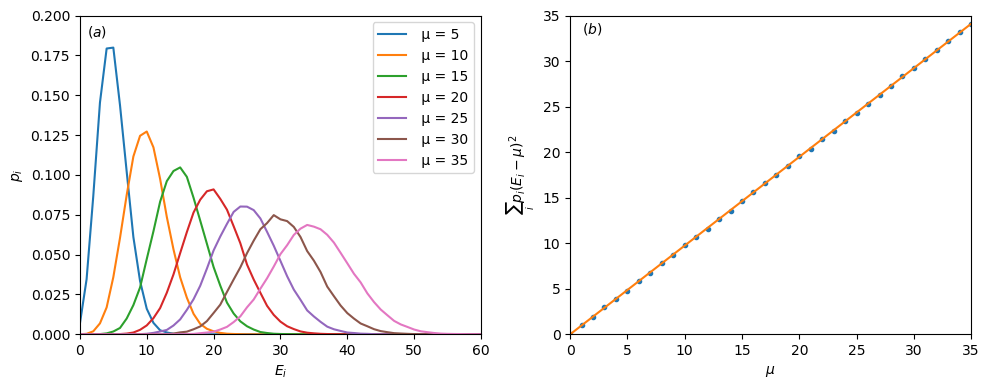

In [9]:
figure(figsize=(10,4))
subplot(1,2,1)
bk = m1
for j in 5:5:35
    i = [1:1:61;]
    k = j
    plot(bk[1:61,j], label = " μ = $k")
end
xlim(0,60)
ylim(0,.20)
xlabel(L"E_i")
ylabel(L"p_i");
text(1,0.187,L"$(a)$")
legend()


#title(L"Distribución \ de \ probabilidad \ con \ \langle n \rangle = 1, \ \kappa = 0.2")
subplot(1,2,2)
x1 = [0:1:35;]
var1 = e1.^2
var2 = pushfirst!(var1,0)
plot(x1,var2, ".")
as1, as2 = linear_fit(x1,var1)
plot(x1,as1 .+ as2*x1)
xlabel(L"\mu")
ylabel(L"\sum_i p_i(E_i - \mu)^2")
text(1,33,L"$(b)$")
xlim(0,35)
ylim(0,35)
#legend()
tight_layout()
#savefig("newerrorp.png")

In order to get an idea of how good our estimations are we plot our mean value along with our standard deviation

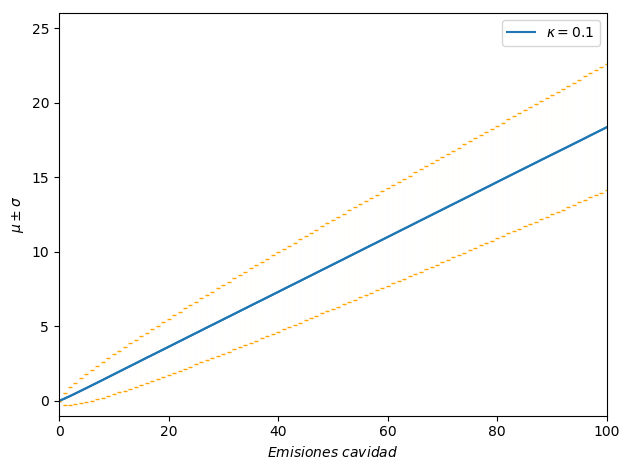

In [6]:
i = [0:1:2000;];
mean_vals = retmeann(k1);
stand_vals = combined(k1);
mean_vals1 = pushfirst!(mean_vals,0)
stand_vals1 = pushfirst!(stand_vals,0)
plot(i,mean_vals1, label = L"\kappa = 0.1")
errorbar(i,mean_vals1, yerr = stand_vals1 ,capsize = 1.7,elinewidth = 0.01, ecolor = "orange")
legend()
ylabel(L"$\mu \pm \sigma$") 
xlabel(L"Emisiones \ cavidad")
xlim(0,100)
ylim(-1,26)
#savefig("newsigma.png")
tight_layout()

Graphing our mean value of spontaneous emissions for diferent cavity linewidht

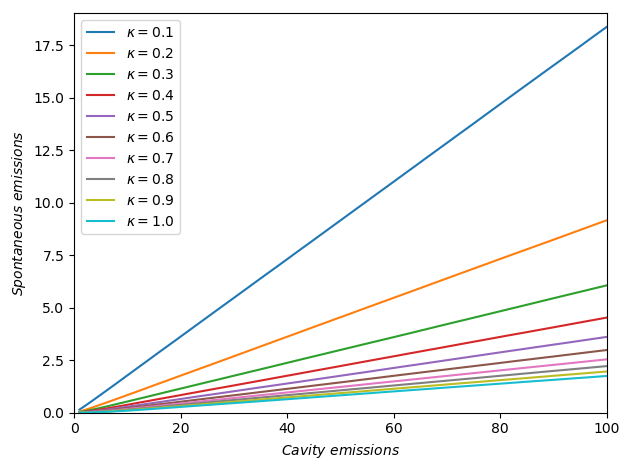

In [7]:
decs1 = retmeann(k1);
decs2 = retmeann(k2);
decs3 = retmeann(k3);
decs4 = retmeann(k4);
decs5 = retmeann(k5);
decs6 = retmeann(k6);
decs7 = retmeann(k7);
decs8 = retmeann(k8);
decs9 = retmeann(k9);
decs10 = retmeann(k10);


i = [1:1:2000;];
plot(i,decs1, label = L"\kappa = 0.1")
plot(i,decs2, label = L"\kappa = 0.2")
plot(i,decs3, label = L"\kappa = 0.3")
plot(i,decs4, label = L"\kappa = 0.4")
plot(i,decs5, label = L"\kappa = 0.5")
plot(i,decs6, label = L"\kappa = 0.6")
plot(i,decs7, label = L"\kappa = 0.7")
plot(i,decs8, label = L"\kappa = 0.8")
plot(i,decs9, label = L"\kappa = 0.9")
plot(i,decs10, label = L"\kappa = 1.0")
xlabel(L"Cavity \ emissions")
ylabel(L"Spontaneous \ emissions")

legend()
xlim(0,100)
ylim(0,19)
tight_layout()